### Introduction to Matplotlib

- Buit on NumPy arrays (and python)
- Integrates directly with pandas
- can create basic or advanced plots
- Sample to use interface (once you get the foundations)

### Concepts covered

- Matplotlib workflow
- importing matplotlib and the 2 ways of plotting
- Plotting data from NumPy arrays
- Plotting data from pandas DataFrames
- Customizing plots
- Saving and sharing plots

### Matplotlib workflow

1. Create Data
2. Create Plot
3. Plot Data (axis on figure)
4. Customise plot
5. Save /Share plot

# Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

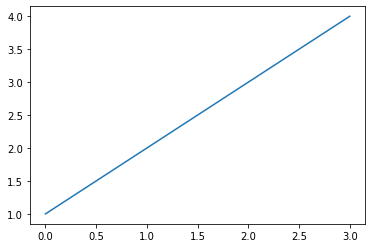

In [2]:
plt.plot([1,2,3,4])

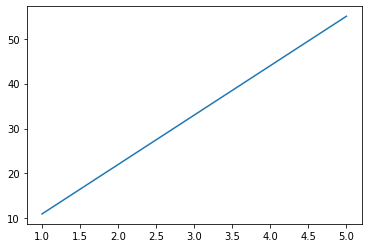

In [3]:
x = [1,2,3,4,5]
y = [11,22,33,44,55]
plt.plot(x,y);

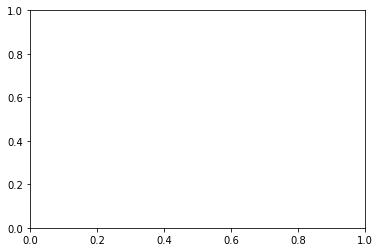

In [4]:
# 1st method
fig = plt.figure() # Creates a figure
ax = fig.add_subplot() # adds some axis
plt.show()

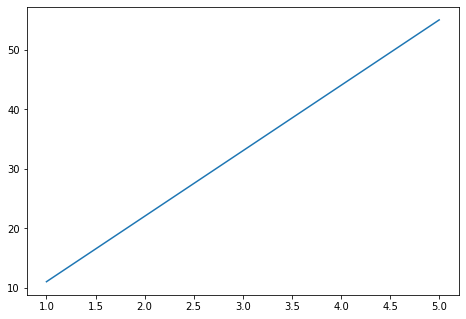

In [5]:
# 2nd method
fig = plt.figure() # Creates a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y) # add some data
plt.show()

<img src="matplotlib-anatomy-of-a-plot.png" />

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

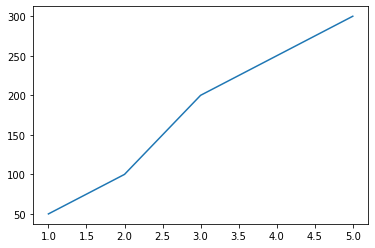

In [7]:
# 3rd method * (recommended)
fig,ax = plt.subplots()
ax.plot(x,[50,100,200,250,300]) # add some data
type(fig),type(ax)

<img src ="./matplotlib-anatomy-of-a-plot-with-code.png"/>

## Matplotlib example workflow

In [8]:
# 0. import matplotlib and get it ready for plotting in Jypyter
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
# 1. prepare data
x = [1,2,3,4]
y = [11,22,33,44]

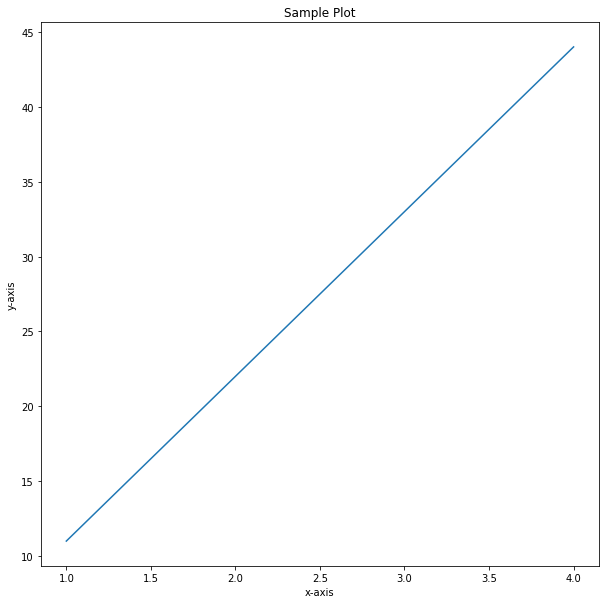

In [14]:
# 2. Setup Plot
fig,ax = plt.subplots(figsize=(10,10)) # (width,height)

# 3. plot data
ax.plot(x,y)

#4. Customize plot
ax.set(title = "Sample Plot",
      xlabel = "x-axis",
      ylabel = "y-axis")

# 5. Save and show (you save the whole figure)
fig.savefig("./sample-plot.png")

## Making figures with NumPy array

we want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [15]:
import numpy as np

In [17]:
# Create some data
x = np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

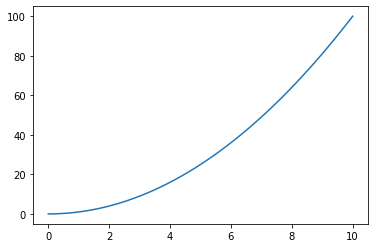

In [18]:
# Plot the data and create a line plots
fig,ax = plt.subplots()
ax.plot(x,x**2)

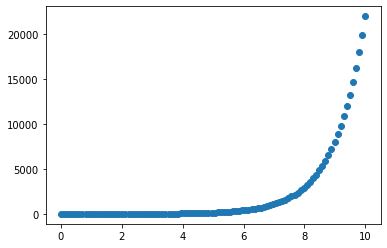

In [20]:
# Use same data to make scatter
fig, ax = plt.subplots()
ax.scatter(x,np.exp(x));

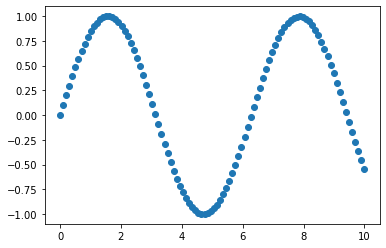

In [22]:
# Another scatter plot 
fig,ax = plt.subplots()
ax.scatter(x,np.sin(x));

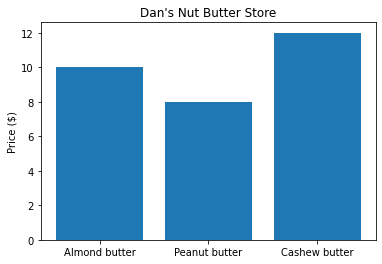

In [25]:
# Make a plot from dictionary 
nut_butter_prices = {"Almond butter":10,
                    "Peanut butter":8,
                    "Cashew butter":12}
fig,ax = plt.subplots()
ax.bar(nut_butter_prices.keys(),nut_butter_prices.values()); # (x,y)
ax.set(title="Dan's Nut Butter Store",
      ylabel="Price ($)");

## Histograms and Subplots

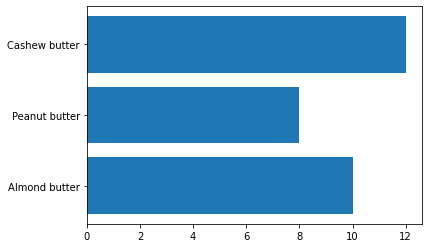

In [28]:
fig,ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()),list(nut_butter_prices.values())); # (x,y)

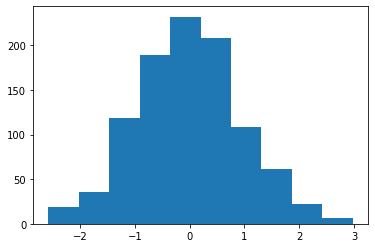

In [30]:
# Make some data for histogram and plot it
x = np.random.randn(1000)
fig,ax = plt.subplots()
ax.hist(x);

### Tow Options for subplots 

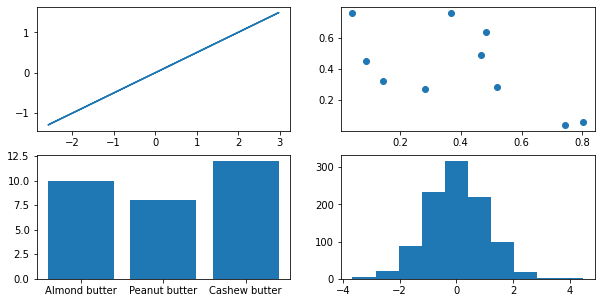

In [41]:
# Subplot option 1
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,
                                          ncols =2,
                                          figsize=(10,5))
# Plot to each different axis
ax1.plot(x,x/2);
ax2.scatter(np.random.random(10),np.random.random(10));
ax3.bar(nut_butter_prices.keys(),nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

### Subplot option 2

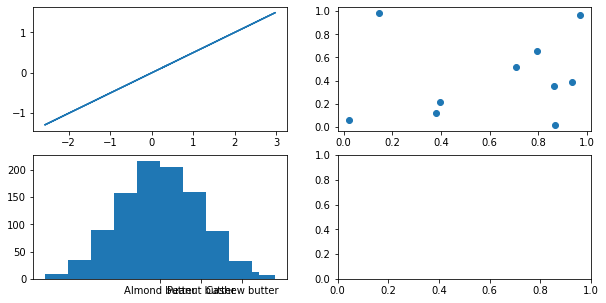

In [44]:
# subplots options 2
fig,ax = plt.subplots(nrows=2,
                     ncols=2,
                     figsize=(10,5))

# plot to each different index
ax[0,0].plot(x,x/2);
ax[0,1].scatter(np.random.random(10),np.random.random(10))
ax[1,0].bar(nut_butter_prices.keys(),nut_butter_prices.values())
ax[1,0].hist(np.random.randn(1000));

### Plotting from pandas DataFrames

In [59]:
import pandas as pd

In [60]:
# Make a data frame
car_sales = pd.read_csv("../datasets/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


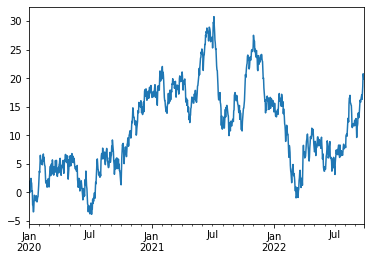

In [61]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2020',periods=1000))
ts = ts.cumsum()
ts.plot();

In [62]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]','')
car_sales

/var/folders/r7/_z9bylgs27v499jfxw9nlsgr0000gn/T/ipykernel_35044/4215731511.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]','')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [63]:
type(car_sales["Price"])

pandas.core.series.Series

In [64]:
# remove last two zeroes
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [65]:
car_sales["Sale Date"] = pd.date_range("1/1/2020",periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [66]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


In [67]:
type(car_sales["Price"][0])

str

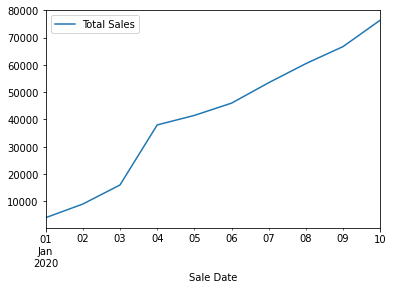

In [68]:
# Lets plot the total sales
car_sales.plot(x="Sale Date",y="Total Sales");

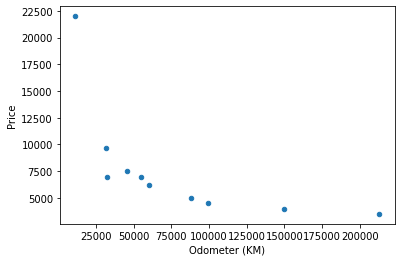

In [72]:
# Reassign price column to int
car_sales["Price"] = car_sales["Price"].astype(int)

# Plot scatter plot with price column as numeric
car_sales.plot(x="Odometer (KM)",y="Price",kind="scatter");

In [73]:
# How about a bar graph?
x = np.random.rand(10,4)
x

# Turn it into a dataframe
df = pd.DataFrame(x,columns=['a','b','c','d'])
df

,a,b,c,d
0,0.026363,0.775189,0.828993,0.619304
1,0.039448,0.908246,0.117677,0.933087
2,0.001510,0.565408,0.751348,0.484034
3,0.892137,0.288656,0.094875,0.301728
4,0.896839,0.721721,0.358944,0.224408
5,0.516185,0.214931,0.999624,0.090231
6,0.153303,0.436817,0.904410,0.979218
7,0.368696,0.718563,0.508745,0.692404
8,0.932340,0.563193,0.445334,0.162802
9,0.933157,0.263071,0.659759,0.092315


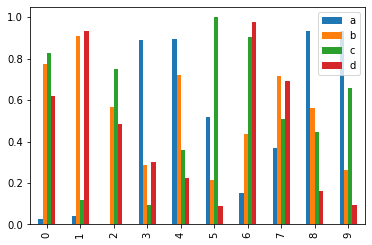

In [75]:
df.plot.bar();

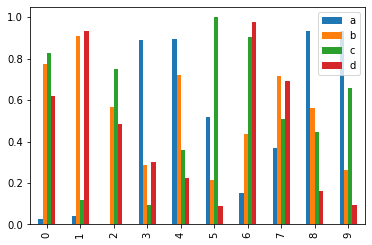

In [76]:
df.plot(kind="bar");

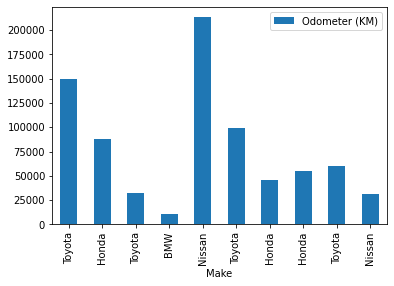

In [77]:
car_sales.plot(x="Make",y="Odometer (KM)",kind="bar");

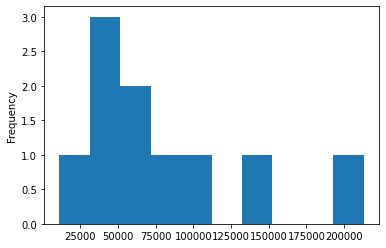

In [78]:
# How about histograms?
car_sales["Odometer (KM)"].plot.hist();

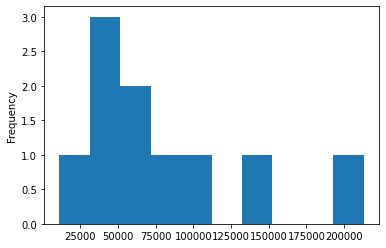

In [80]:
car_sales["Odometer (KM)"].plot(kind="hist");

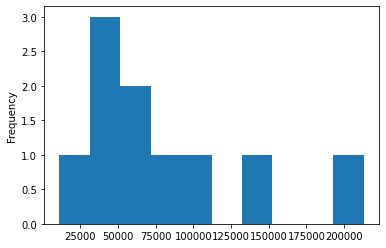

In [82]:
car_sales["Odometer (KM)"].plot.hist(bins=10);

In [84]:
# Lets try on another dataset
heart_desease = pd.read_csv("../datasets/heart-disease.csv")
heart_desease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


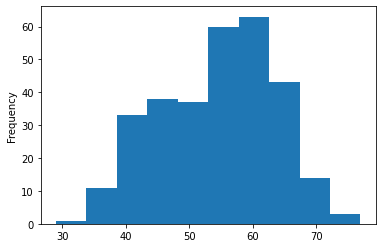

In [87]:
# Create a Histogram of age
heart_desease["age"].plot.hist(bins=10);

In [88]:
heart_desease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


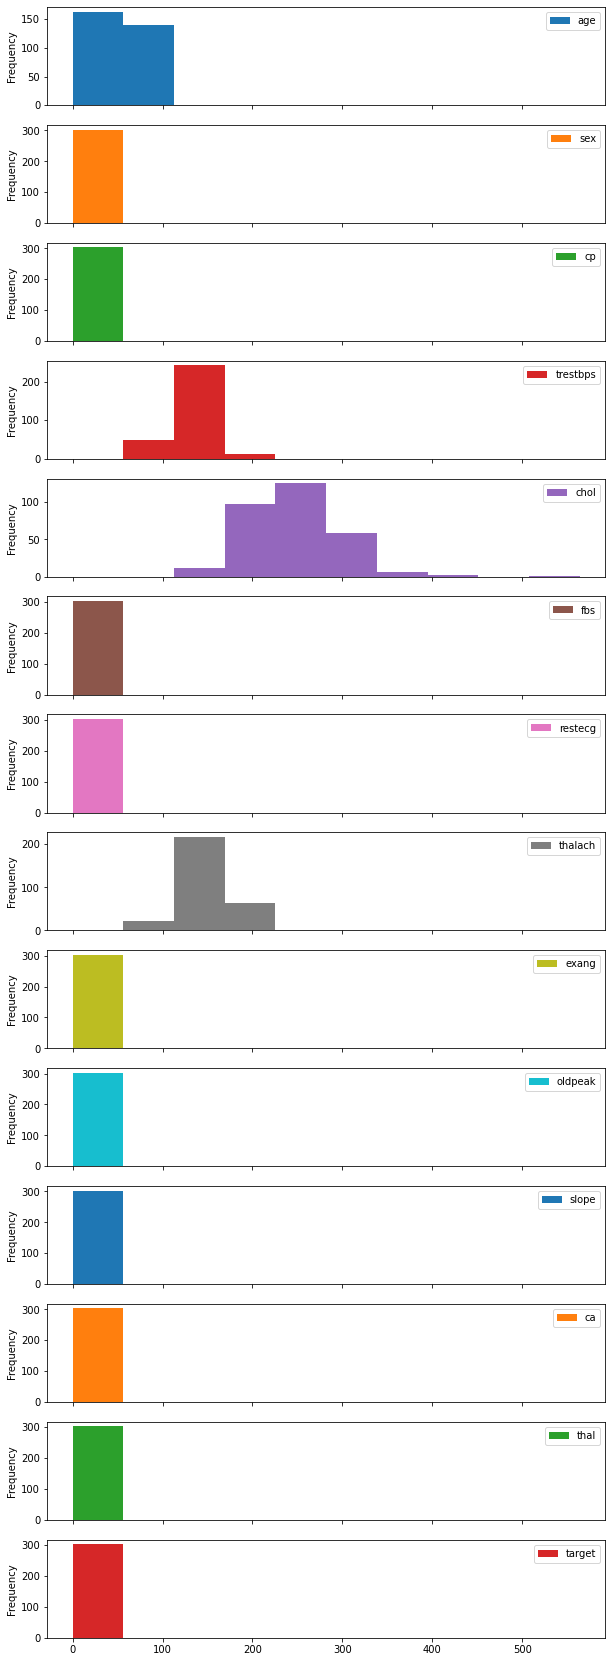

In [91]:
heart_desease.plot.hist(figsize=(10,30),subplots=True);

### Which one you should use? (pyplot vs matplotlib 00 method?)

* When ploting something quickly, okay to use pyplot method
* When plotting something more advanced, use the 00 method

In [94]:
# 
over_50 = heart_desease[heart_desease["age"]>50]
over_50.head()
len(over_50)

208

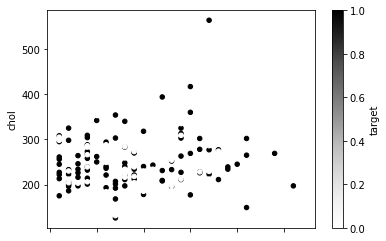

In [96]:
# pyplot method
over_50.plot(kind="scatter",
            x='age',
            y='chol',
            c='target');

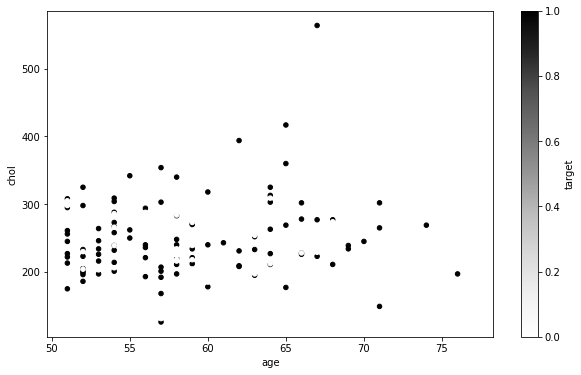

In [100]:
# OO method
fig,ax = plt.subplots(figsize=(10,6))
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target",
            ax=ax);

#ax.set_xlim([45,100]);

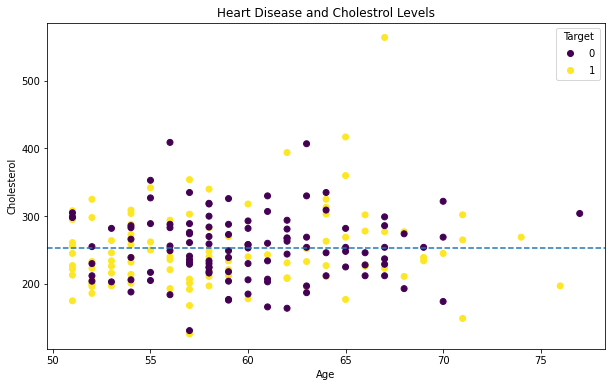

In [107]:
## OO method from scratch
fig,ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y= over_50["chol"],
                     c=over_50["target"]);

# Customize the plot
ax.set(title="Heart Disease and Cholestrol Levels",
      xlabel="Age",
      ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(),title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle='--');

In [108]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


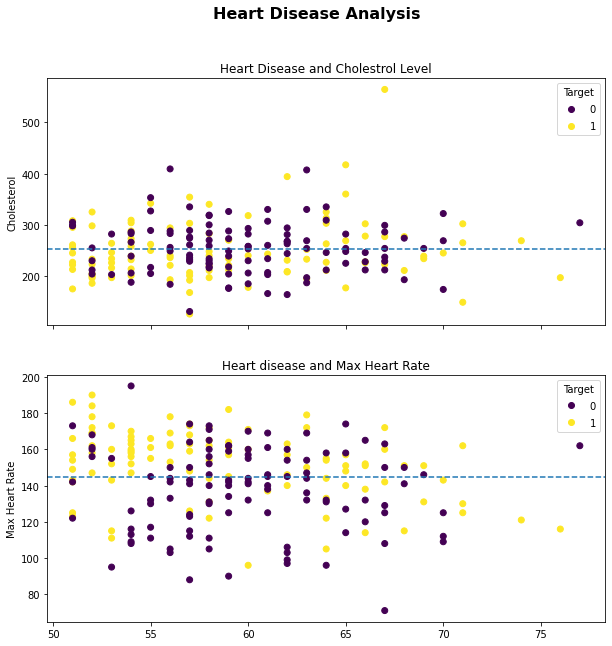

In [115]:
# Subplot of chol, aget thalach
fig, (ax0,ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10,10),
                             sharex=True);
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"]);
# Customize ax0
ax0.set(title="Heart Disease and Cholestrol Level",
       ylabel="Cholesterol");

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(),title="Target");

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

# Add data to ax1
scatter1 = ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"])
# Customize ax1
ax1.set(title="Heart disease and Max Heart Rate",
       ylabel="Max Heart Rate");

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(),title="Target");

# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis",fontsize=16,fontweight="bold");

### Customizing Matplotlib plots and getting stylish

In [117]:
# See the different styles avilable
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

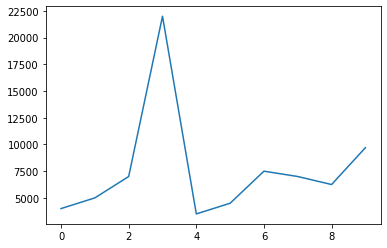

In [118]:
car_sales["Price"].plot();

In [130]:
plt.style.use('seaborn')

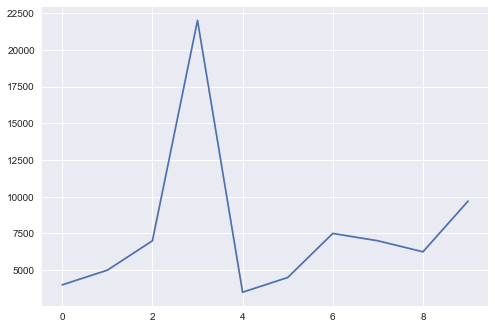

In [131]:
car_sales["Price"].plot();

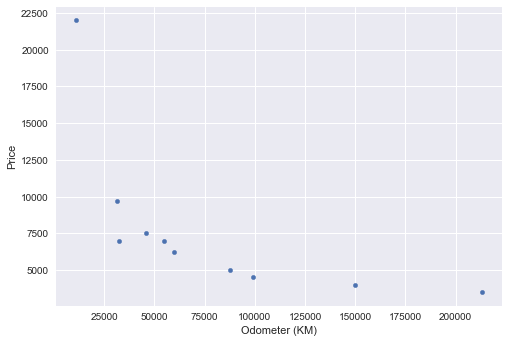

In [132]:
car_sales.plot(x="Odometer (KM)",y="Price",kind="scatter");

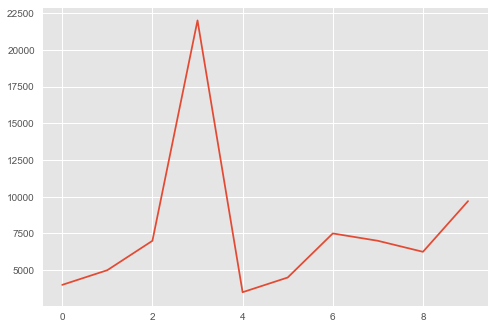

In [133]:
plt.style.use("ggplot")
car_sales["Price"].plot();

In [134]:
# Create some data
x = np.random.randn(10,4)
x

array([[ 1.48626752,  1.46780608, -0.0322705 , -0.62533136],
       [-0.04050807, -0.93538035,  1.67912812,  1.23852213],
       [ 0.06200366, -0.18987847, -0.12218636, -1.24668774],
       [-0.09058073, -1.07366901,  0.85697858, -0.3414566 ],
       [ 0.09297841, -1.00683139, -2.34149005,  1.92831729],
       [-0.54809862,  1.22149613,  1.8062259 ,  0.77369971],
       [ 0.52135263,  1.01207478,  1.07508803,  0.42490326],
       [-0.625269  ,  0.34465073,  0.13921509, -1.17859105],
       [-0.58071223, -0.81542398, -1.12281266,  1.02685756],
       [-0.54624492, -0.17761489,  0.68049741,  1.8934446 ]])

In [135]:
df = pd.DataFrame(x,columns=['a','b','c','d'])
df

,a,b,c,d
0,1.486268,1.467806,-0.032271,-0.625331
1,-0.040508,-0.935380,1.679128,1.238522
2,0.062004,-0.189878,-0.122186,-1.246688
3,-0.090581,-1.073669,0.856979,-0.341457
4,0.092978,-1.006831,-2.341490,1.928317
5,-0.548099,1.221496,1.806226,0.773700
6,0.521353,1.012075,1.075088,0.424903
7,-0.625269,0.344651,0.139215,-1.178591
8,-0.580712,-0.815424,-1.122813,1.026858
9,-0.546245,-0.177615,0.680497,1.893445


matplotlib.axes._subplots.AxesSubplot

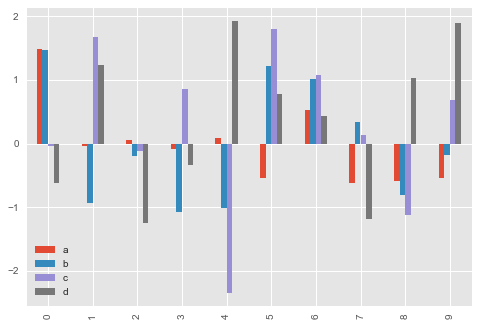

In [137]:
ax = df.plot(kind="bar")
type(ax)

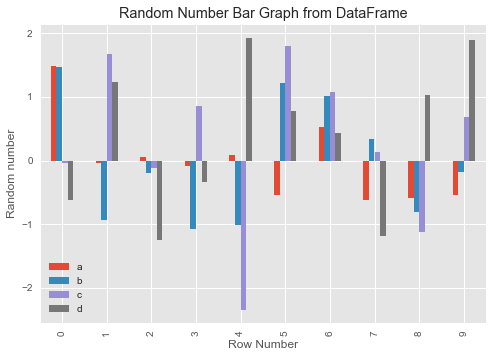

In [139]:
# customize out plot with the set() method
ax = df.plot(kind="bar")
# Add some labels and a title
ax.set(title="Random Number Bar Graph from DataFrame",
      xlabel="Row Number",
      ylabel="Random number")
# Make the legend visible 
ax.legend().set_visible(True)

### This plot shows some information about the heart disease

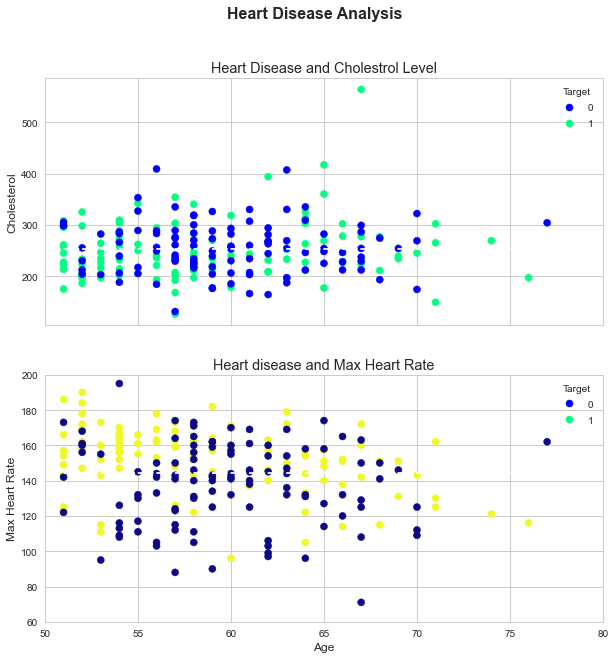

In [146]:
plt.style.use("seaborn-whitegrid")

# Subplot of chol, aget thalach
fig, (ax0,ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10,10),
                             sharex=True);
# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter");
# Customize ax0
ax0.set(title="Heart Disease and Cholestrol Level",
       ylabel="Cholesterol");

#
ax0.set_xlim([50,80])

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(),title="Target");

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

# Add data to ax1
scatter1 = ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"],
                      cmap="plasma")
# Customize ax1
ax1.set(title="Heart disease and Max Heart Rate",
        xlabel="Age",
        ylabel="Max Heart Rate");

# Change ax1 x axis limits
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])
# Add a legend to ax1
ax1.legend(*scatter.legend_elements(),title="Target");

# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis",fontsize=16,fontweight="bold");

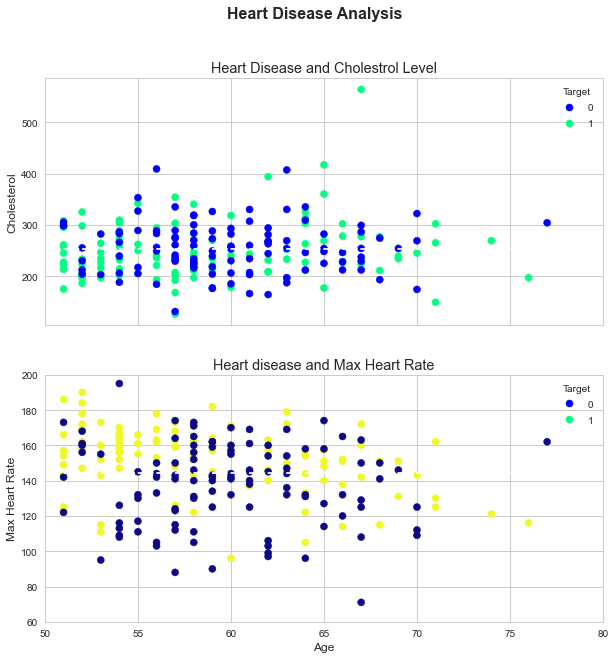

In [147]:
fig

In [148]:
fig.savefig("heart-disease-analysis-plot-saved-with-code")